# Patient Segmentation by Vital Signs - Data Cleaning & Preprocessing

This notebook handles data cleaning, preprocessing, and feature scaling for patient vital signs data.

In [10]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

# Set style for visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Load and Inspect Data

In [11]:
# Load the raw dataset
df = pd.read_csv('../dataset/five vital signs of normal people.csv')

print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nData Info:")
print(df.info())
print("\nBasic Statistics:")
print(df.describe())

Dataset Shape: (102, 46)

First few rows:
   Subject ID  Diastolic blood pressure reading 1  \
0           1                                  66   
1           2                                  75   
2           3                                  62   
3           4                                  80   
4           5                                  77   

   Diastolic blood pressure reading 2  Diastolic blood pressure reading 3  \
0                                  64                                  68   
1                                  76                                  76   
2                                  60                                  60   
3                                  79                                  77   
4                                  79                                  77   

   Diastolic blood pressure reading 4  Diastolic blood pressure reading 5  \
0                                  66                                  66   
1                     

## 2. Check for Missing Values

In [12]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())
print("\nTotal Missing Values:", df.isnull().sum().sum())

# Visualize missing data
if df.isnull().sum().sum() > 0:
    plt.figure(figsize=(12, 4))
    sns.heatmap(df.isnull(), cbar=True, cmap='viridis')
    plt.title('Missing Values Heatmap')
    plt.show()
else:
    print("✓ No missing values found in the dataset!")

Missing Values:
Subject ID                            0
Diastolic blood pressure reading 1    0
Diastolic blood pressure reading 2    0
Diastolic blood pressure reading 3    0
Diastolic blood pressure reading 4    0
Diastolic blood pressure reading 5    0
Diastolic blood pressure reading 6    0
Diastolic blood pressure reading 7    0
Diastolic blood pressure reading 8    0
Diastolic blood pressure reading 9    0
Systolic blood pressure reading 1     0
Systolic blood pressure reading 2     0
Systolic blood pressure reading 3     0
Systolic blood pressure reading 4     0
Systolic blood pressure reading 5     0
Systolic blood pressure reading 6     0
Systolic blood pressure reading 7     0
Systolic blood pressure reading 8     0
Systolic blood pressure reading 9     0
Heart rate reading 1                  0
Heart rate reading 2                  0
Heart rate reading 3                  0
Heart rate reading 4                  0
Heart rate reading 5                  0
Heart rate reading 6    

## 3. Aggregate Vital Signs (Average across multiple readings)

In [13]:
# Aggregate vital signs by calculating mean across multiple readings
vital_signs_data = []

for idx, row in df.iterrows():
    subject_id = row['Subject ID']
    
    # Extract systolic BP readings
    systolic_cols = [col for col in df.columns if 'Systolic' in col]
    systolic_mean = df.loc[idx, systolic_cols].mean()
    
    # Extract diastolic BP readings
    diastolic_cols = [col for col in df.columns if 'Diastolic' in col]
    diastolic_mean = df.loc[idx, diastolic_cols].mean()
    
    # Extract heart rate readings
    hr_cols = [col for col in df.columns if 'Heart rate' in col]
    hr_mean = df.loc[idx, hr_cols].mean()
    
    # Extract oxygen saturation readings
    o2_cols = [col for col in df.columns if 'Oxygen saturation' in col]
    o2_mean = df.loc[idx, o2_cols].mean()
    
    # Extract temperature readings
    temp_cols = [col for col in df.columns if 'Temperature' in col]
    temp_mean = df.loc[idx, temp_cols].mean()
    
    vital_signs_data.append({
        'Subject_ID': subject_id,
        'Systolic_BP': systolic_mean,
        'Diastolic_BP': diastolic_mean,
        'Heart_Rate': hr_mean,
        'Oxygen_Saturation': o2_mean,
        'Temperature': temp_mean
    })

# Create aggregated dataframe
df_aggregated = pd.DataFrame(vital_signs_data)
print("Aggregated Data Shape:", df_aggregated.shape)
print("\nAggregated Data:")
print(df_aggregated.head(10))
print("\nAggregated Statistics:")
print(df_aggregated.describe())

Aggregated Data Shape: (102, 6)

Aggregated Data:
   Subject_ID  Systolic_BP  Diastolic_BP  Heart_Rate  Oxygen_Saturation  \
0         1.0   108.777778     66.000000   75.444444          96.555556   
1         2.0   108.666667     74.777778   66.333333          98.333333   
2         3.0   104.333333     60.222222   85.333333          96.444444   
3         4.0    94.111111     79.222222   87.222222          95.444444   
4         5.0   120.777778     78.111111   95.555556          95.666667   
5         6.0   100.000000     74.222222   74.444444          98.666667   
6         7.0    91.777778     79.666667   65.222222          97.888889   
7         8.0   113.888889     74.111111   65.444444          98.222222   
8         9.0    94.555556     66.555556   71.111111          95.777778   
9        10.0   108.555556     64.555556   80.555556          98.888889   

   Temperature  
0    36.100000  
1    35.500000  
2    35.322222  
3    36.022222  
4    35.444444  
5    36.344444  
6    

## 4. Detect and Handle Outliers

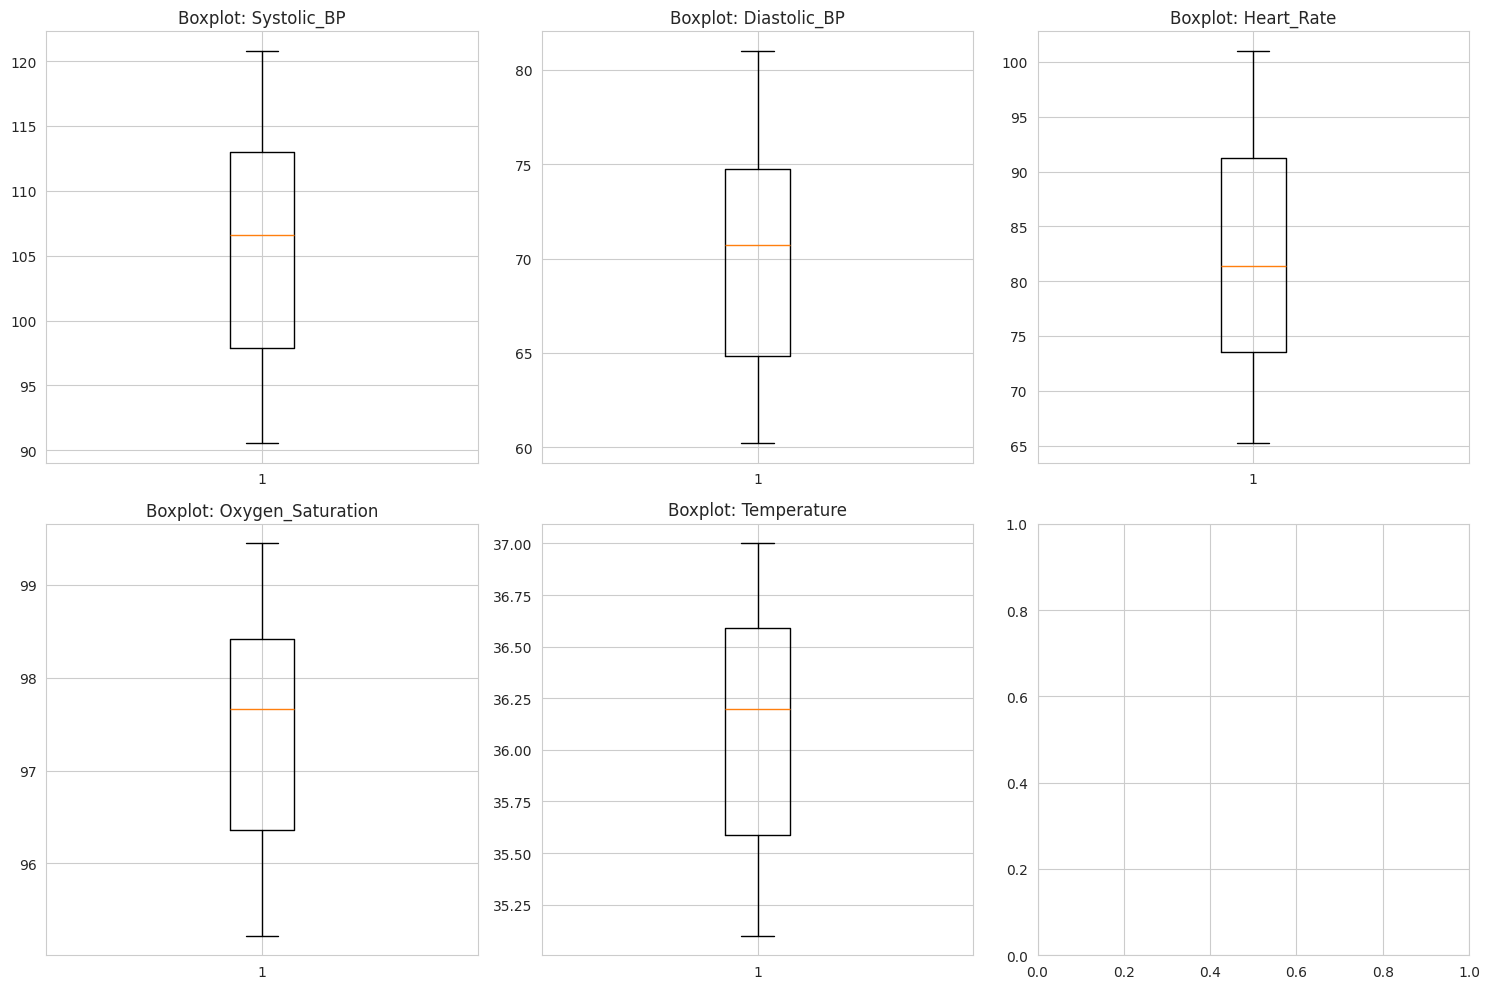

Outlier Detection (IQR Method):

Systolic_BP:
  Lower Bound: 75.19, Upper Bound: 135.64
  Number of Outliers: 0

Diastolic_BP:
  Lower Bound: 50.07, Upper Bound: 89.51
  Number of Outliers: 0

Heart_Rate:
  Lower Bound: 47.04, Upper Bound: 117.82
  Number of Outliers: 0

Oxygen_Saturation:
  Lower Bound: 93.28, Upper Bound: 101.50
  Number of Outliers: 0

Temperature:
  Lower Bound: 34.09, Upper Bound: 38.09
  Number of Outliers: 0


In [14]:
# Visualize distributions and outliers
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, col in enumerate(df_aggregated.columns[1:]):
    axes[idx].boxplot(df_aggregated[col])
    axes[idx].set_title(f'Boxplot: {col}')
    axes[idx].grid(True)

plt.tight_layout()
plt.show()

# Detect outliers using IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

print("Outlier Detection (IQR Method):")
print("=" * 60)
for col in df_aggregated.columns[1:]:
    outliers, lower, upper = detect_outliers_iqr(df_aggregated, col)
    print(f"\n{col}:")
    print(f"  Lower Bound: {lower:.2f}, Upper Bound: {upper:.2f}")
    print(f"  Number of Outliers: {len(outliers)}")
    if len(outliers) > 0:
        print(f"  Outlier Subjects: {outliers['Subject_ID'].tolist()}")

In [15]:
# Keep outliers for now (you can remove them if needed)
# df_cleaned = df_aggregated.copy()  # If you want to remove outliers
df_cleaned = df_aggregated.copy()
print(f"Final cleaned dataset shape: {df_cleaned.shape}")
print(f"Records retained: {len(df_cleaned)} out of {len(df_aggregated)}")

Final cleaned dataset shape: (102, 6)
Records retained: 102 out of 102


## 5. Visualize Feature Distributions

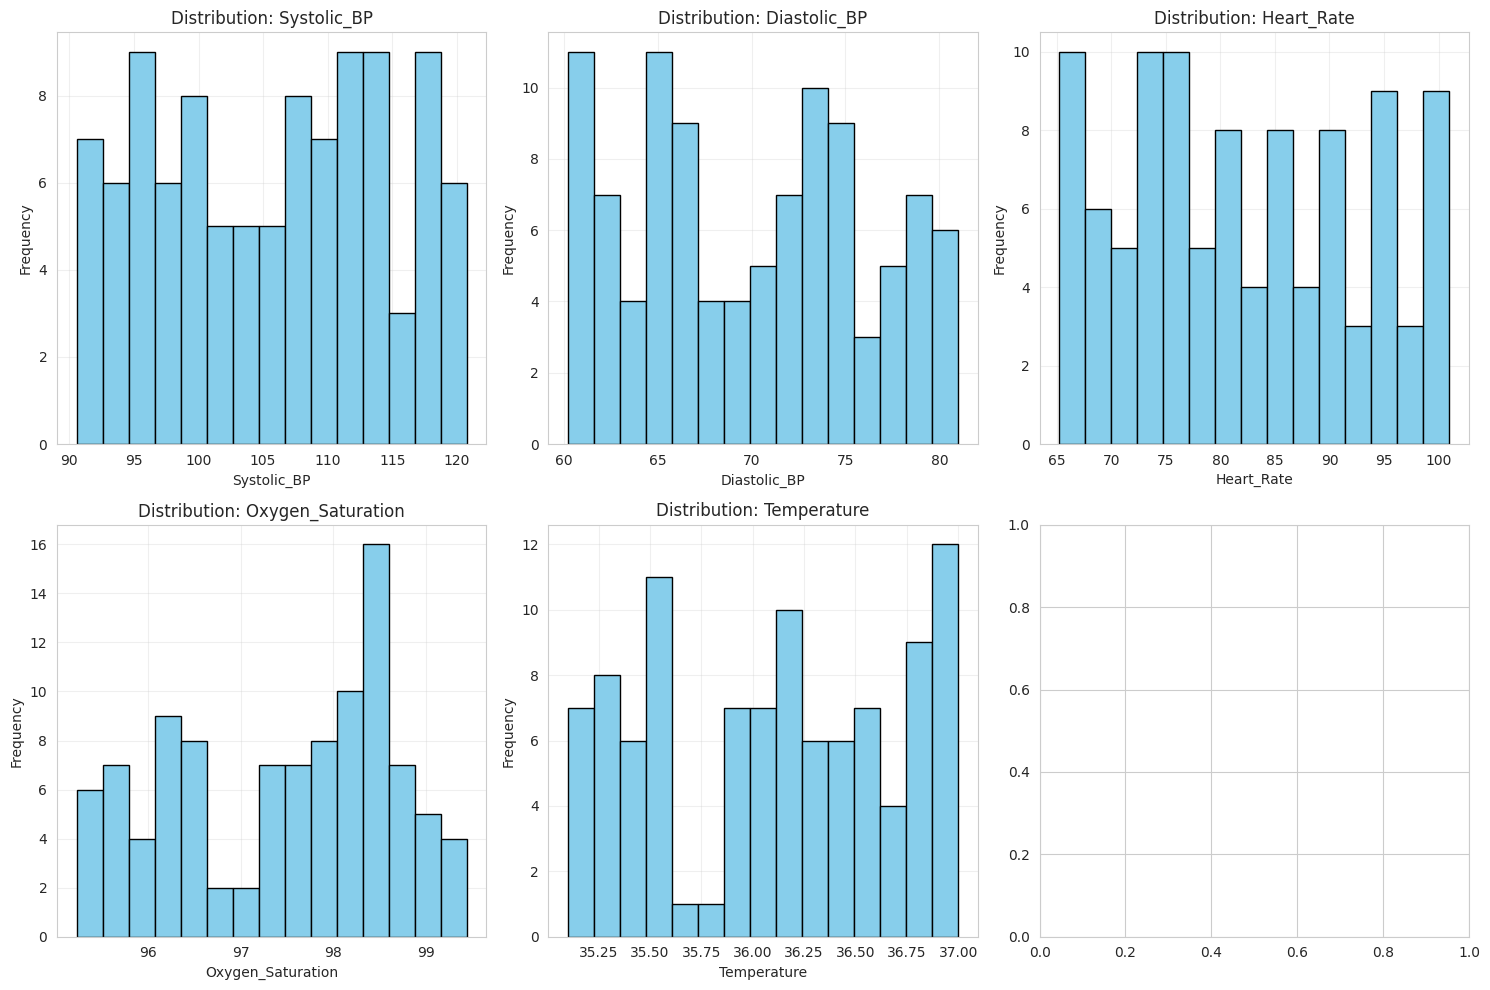

Creating pairplot...


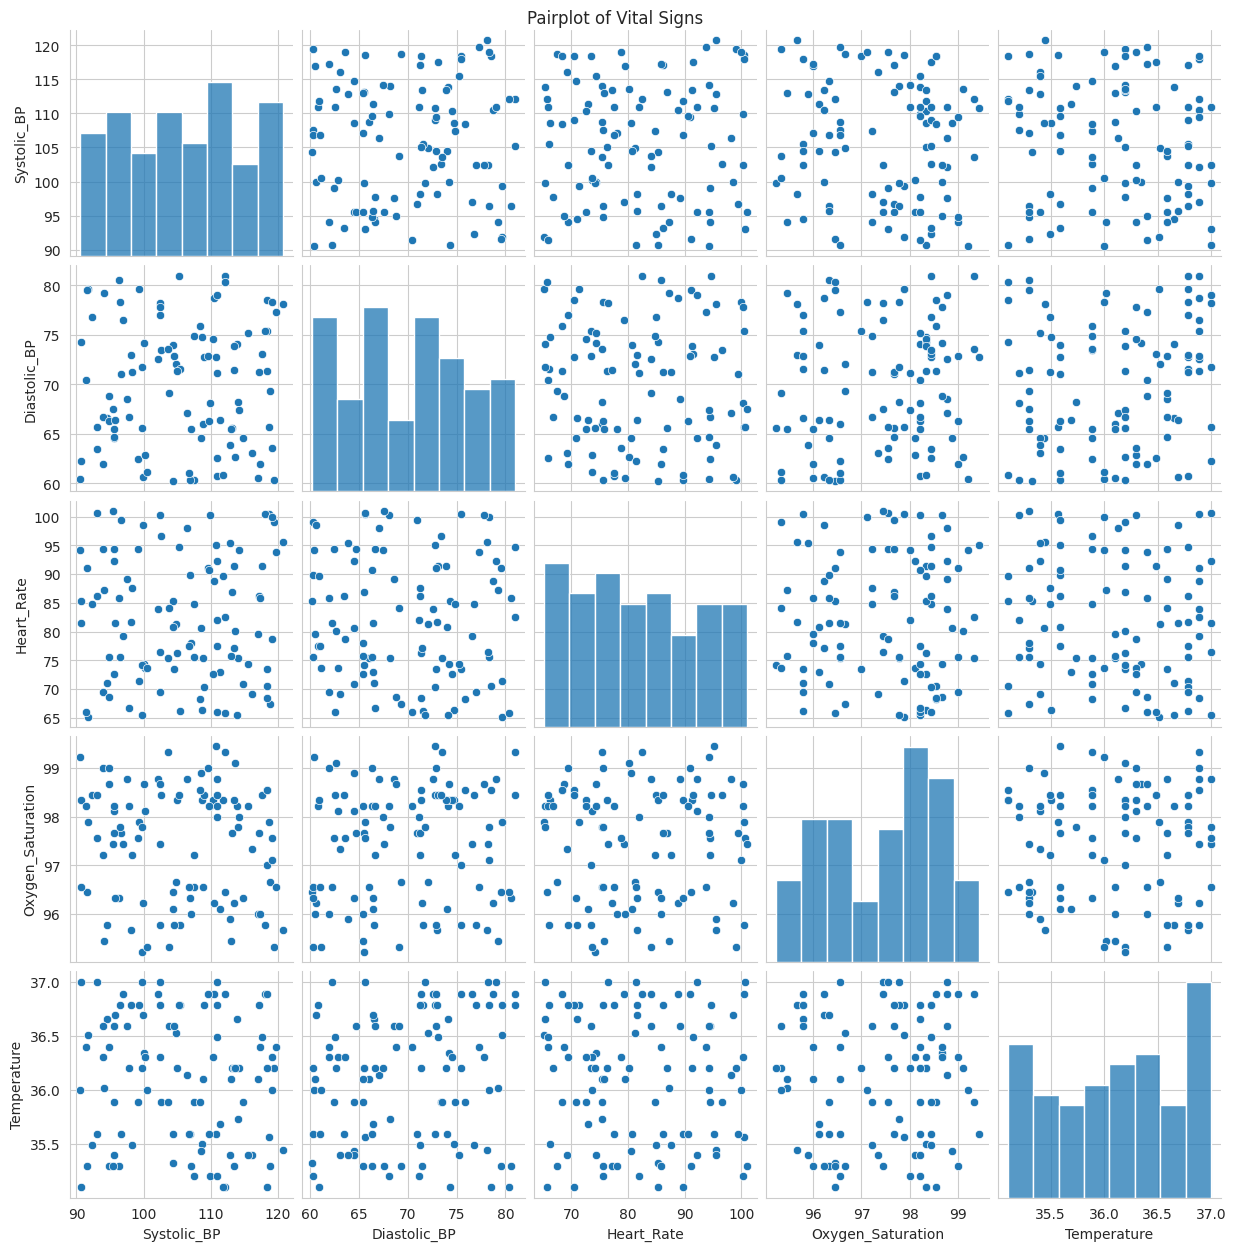

In [16]:
# Visualize distributions of vital signs
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, col in enumerate(df_cleaned.columns[1:]):
    axes[idx].hist(df_cleaned[col], bins=15, color='skyblue', edgecolor='black')
    axes[idx].set_title(f'Distribution: {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Pairplot to see relationships
print("Creating pairplot...")
sns.pairplot(df_cleaned.iloc[:, 1:], diag_kind='hist')
plt.suptitle('Pairplot of Vital Signs', y=1.001)
plt.show()

## 6. Scale Features (Normalization)

In [17]:
# Extract features (exclude Subject_ID)
features = df_cleaned.iloc[:, 1:].values

# Standardize features using StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

print("Original Features Statistics:")
print(f"  Shape: {features.shape}")
print(f"  Mean: {features.mean(axis=0)}")
print(f"  Std: {features.std(axis=0)}")

print("\nScaled Features Statistics:")
print(f"  Shape: {features_scaled.shape}")
print(f"  Mean: {features_scaled.mean(axis=0)}")
print(f"  Std: {features_scaled.std(axis=0)}")

# Create DataFrame with scaled features for reference
df_scaled = pd.DataFrame(
    features_scaled, 
    columns=df_cleaned.columns[1:],
    index=df_cleaned['Subject_ID']
)
print("\nScaled Features (first 5 rows):")
print(df_scaled.head())

Original Features Statistics:
  Shape: (102, 5)
  Mean: [105.7167756   69.94444444  82.13507625  97.44989107  36.10174292]
  Std: [ 8.71375159  6.17772664 10.72073067  1.16215826  0.58380414]

Scaled Features Statistics:
  Shape: (102, 5)
  Mean: [ 3.36441115e-15 -2.04847033e-15  2.91705657e-16 -1.74990741e-14
 -1.14548893e-14]
  Std: [1. 1. 1. 1. 1.]

Scaled Features (first 5 rows):
            Systolic_BP  Diastolic_BP  Heart_Rate  Oxygen_Saturation  \
Subject_ID                                                             
1.0            0.351284     -0.638494   -0.624084          -0.769547   
2.0            0.338533      0.782381   -1.473943           0.760174   
3.0           -0.158765     -1.573754    0.298325          -0.865155   
4.0           -1.331879      1.501811    0.474515          -1.725623   
5.0            1.728418      1.321953    1.251825          -1.534408   

            Temperature  
Subject_ID               
1.0           -0.002985  
2.0           -1.030727  
3.0 

## 7. Save Cleaned and Scaled Data

In [18]:
# Save cleaned aggregated data
df_cleaned.to_csv('../dataset/cleaned/aggregated_vitals_cleaned.csv', index=False)
print("✓ Saved: aggregated_vitals_cleaned.csv")

# Save scaled features as numpy array
np.save('../dataset/cleaned/scaled_features.npy', features_scaled)
print("✓ Saved: scaled_features.npy")

# Save scaler for later use in prediction
import pickle
with open('../dataset/cleaned/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
print("✓ Saved: scaler.pkl")

print("\n" + "="*60)
print("DATA CLEANING COMPLETED SUCCESSFULLY!")
print("="*60)
print(f"\nCleaned Dataset:")
print(f"  - Number of patients: {df_cleaned.shape[0]}")
print(f"  - Features: {list(df_cleaned.columns[1:])}")
print(f"  - Shape: {df_cleaned.shape}")
print(f"\nScaled Features:")
print(f"  - Shape: {features_scaled.shape}")
print(f"  - Ready for clustering!")


✓ Saved: aggregated_vitals_cleaned.csv
✓ Saved: scaled_features.npy
✓ Saved: scaler.pkl

DATA CLEANING COMPLETED SUCCESSFULLY!

Cleaned Dataset:
  - Number of patients: 102
  - Features: ['Systolic_BP', 'Diastolic_BP', 'Heart_Rate', 'Oxygen_Saturation', 'Temperature']
  - Shape: (102, 6)

Scaled Features:
  - Shape: (102, 5)
  - Ready for clustering!
